In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import SAP_features as SAP

%matplotlib inline

In [2]:
sound_file = '2023_03_31_7_03_30.wav'
fs, audio = wavfile.read(sound_file)
audio_clip = audio[:fs*5]
ipd.Audio(sound_file)

sap = SAP.SAP_features(audio_clip, fs, window_size=1323, hop_length=163)

c:\Users\nriveira\birdsong\SAP_features.py:39: RuntimeWarning: invalid value encountered in divide
  self.mean_freq = self.f.dot(self.sonogram**2) / np.sum(self.sonogram**2, axis=0)


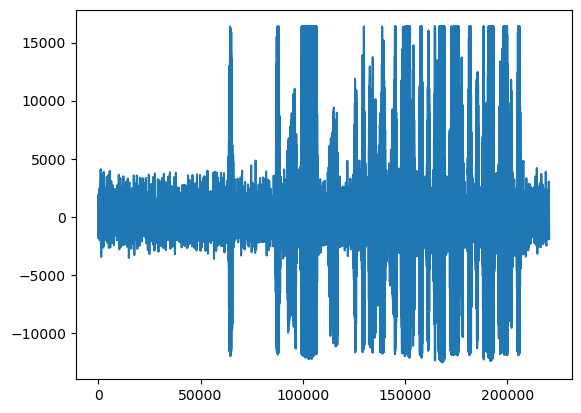

In [24]:
# Plot the first 5 seconds of the audio
plt.plot(audio_clip[:fs*5])

## STFT and Spectral Derivative

C:\Users\nriveira\AppData\Local\Temp\ipykernel_14780\1256073786.py:4: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(sap.t,sap.f, np.log(sap.sonogram))


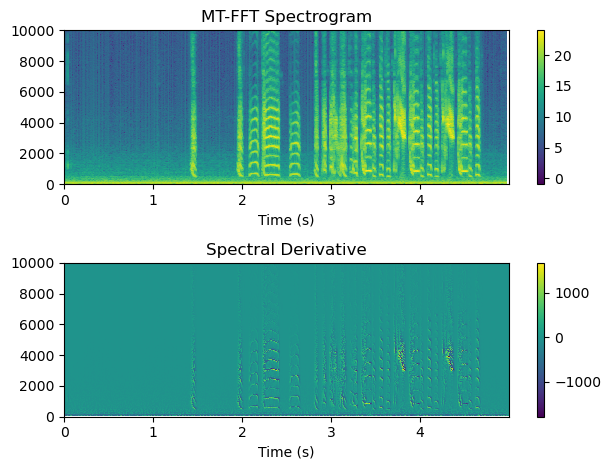

In [23]:
import numpy as np

plt.subplot(2,1,1)
plt.pcolormesh(sap.t,sap.f, np.log(sap.sonogram))
plt.title('MT-FFT Spectrogram')
plt.colorbar()
plt.ylim([0, 10000])
plt.xlabel('Time (s)')

plt.subplot(2,1,2)
plt.pcolormesh(sap.t,sap.f, np.cbrt(sap.spectral_derivative))
plt.title('Spectral Derivative')
plt.colorbar()
plt.ylim([0, 10000])
plt.xlabel('Time (s)')

plt.tight_layout()

## Amplitude ##

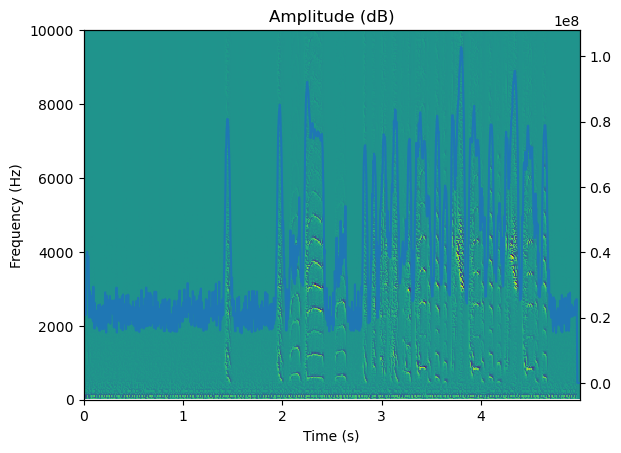

In [22]:
fig, ax1 = plt.subplots()
ax1.pcolormesh(sap.t,sap.f, np.cbrt(sap.spectral_derivative))
plt.ylim([0, 10000])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Amplitude (dB)')

ax2 = ax1.twinx()
ax2.plot(sap.t, sap.amplitude**2)

## Pitch Estimation

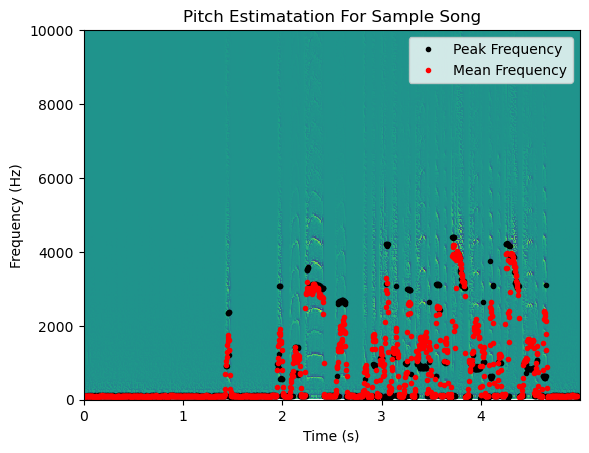

In [21]:
plt.subplots()
plt.pcolormesh(sap.t,sap.f, np.cbrt(sap.spectral_derivative))
plt.ylim([0, 10000])

# TODO - fix yin sampling rate
plt.plot(sap.t, sap.peak_freq, '.k', label='Peak Frequency')
plt.plot(sap.t, sap.mean_freq, '.r', label='Mean Frequency')
#plt.plot(sap.t, sap.yin_freq, '.b', label='Fundamental Frequency')
plt.title('Pitch Estimatation For Sample Song')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()

## Weiner Entropy

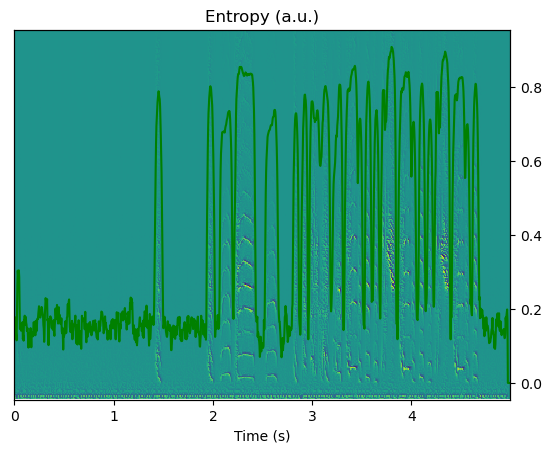

In [26]:
fig, ax1 = plt.subplots()
ax1.pcolormesh(sap.t,sap.f, np.cbrt(sap.spectral_derivative))
plt.ylim([0, 10000])
ax1.set_yticks([])
plt.xlabel('Time (s)')
plt.title('Entropy (a.u.)')

ax2 = ax1.twinx()
ax2.plot(sap.t, 2*sap.entropy, 'g', label='Spectral Entropy')

## Frequency Modulation

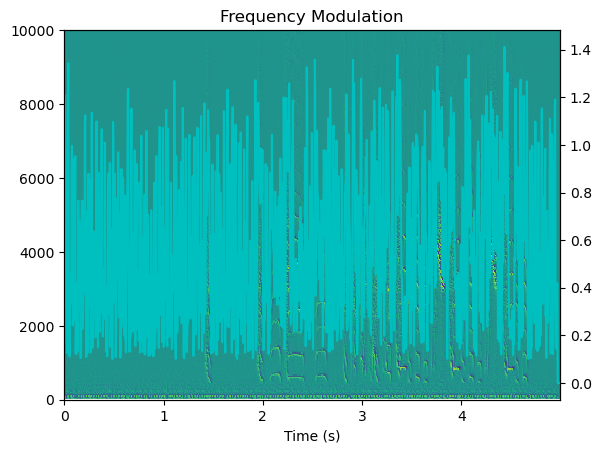

In [19]:
fig, ax1 = plt.subplots()
plt.pcolormesh(sap.t,sap.f, np.cbrt(sap.spectral_derivative))
plt.ylim([0, 10000])
plt.xlabel('Time (s)')
plt.title('Frequency Modulation')

ax2 = ax1.twinx()
ax2.plot(sap.t, sap.frequency_modulation, 'c')

## Amplitude Modulation

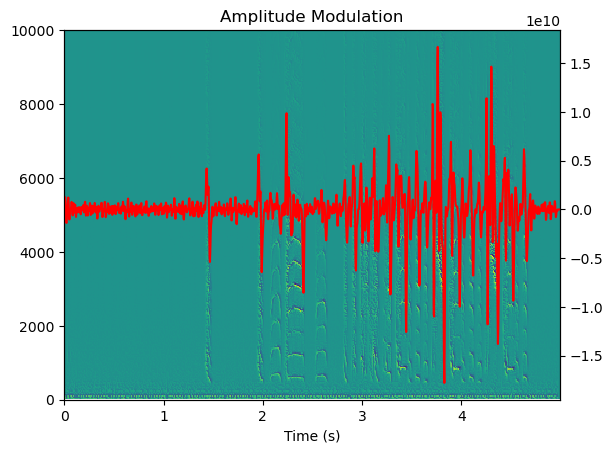

In [27]:
fig, ax1 = plt.subplots()
plt.pcolormesh(sap.t,sap.f, np.cbrt(sap.spectral_derivative))
plt.ylim([0, 10000])
plt.xlabel('Time (s)')
plt.title('Amplitude Modulation')

ax2 = ax1.twinx()
ax2.plot(sap.t, sap.amplitude_modulation, 'r')